### Update trigger.txt file

In [6]:
import pandas as pd
from pathlib import Path
import mne

anno_file = Path('./data/00003/00003+_annotations.txt')
event_file = Path('./data/00003/00003_events.txt')
df = pd.read_csv(anno_file,header=None).values.tolist()
df = df[11:]     # you need to update based on your experiment
# print(df)
tri_val = {'DC trigger 9':2**0, 'DC trigger 10':2**1, 'DC trigger 11':2**2, 
           'DC trigger 12':2**3, 'DC trigger 13':2**4, 'DC trigger 14':2**5, 
           'DC trigger 15':2**6, 'DC trigger 16':2**7}

events = []
row = 0
while row<(len(df)-1):
    event_id = tri_val[df[row][1]]
    while row<(len(df)-1) and df[row][0] == df[row+1][0]:
#         print('y')
#         print(len(events))
        event_id += tri_val[df[row+1][1]]
        df.pop(row+1)
        
#     event = [df[row][0],event_id]
    events.append([round(float(df[row][0]),3),event_id])
#     print([df[row][0],event_id])
    row += 1
#     print(row,len(df))
    
df = pd.DataFrame(events)
# print(df)
df.to_csv(event_file, header=False, index=False)

### alignment

Extracting EDF parameters from /home/yossi/Documents/Project/My_exp/data/00001/00001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


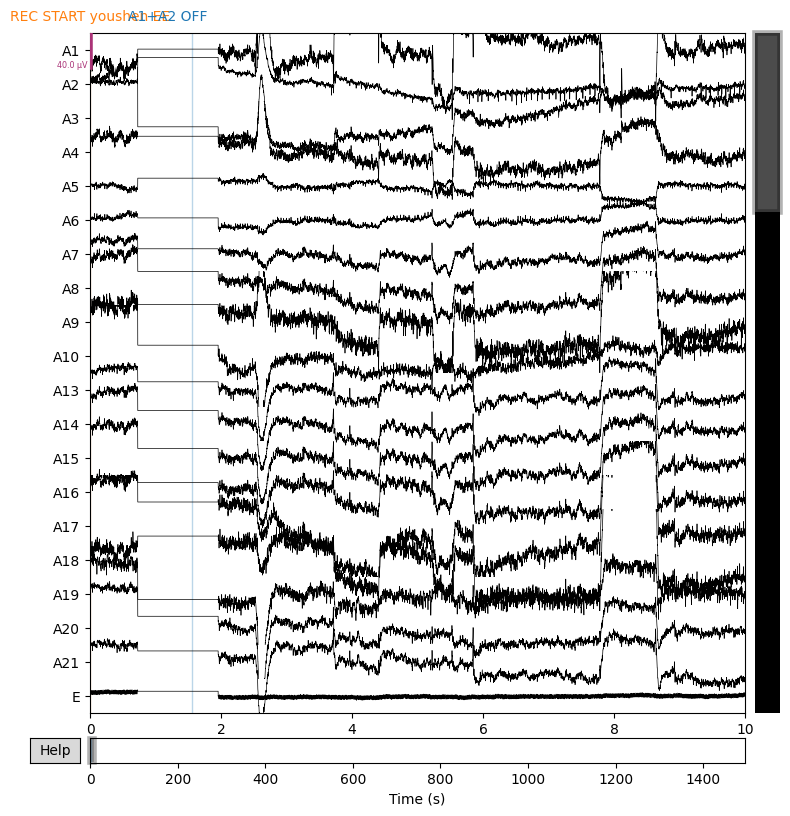

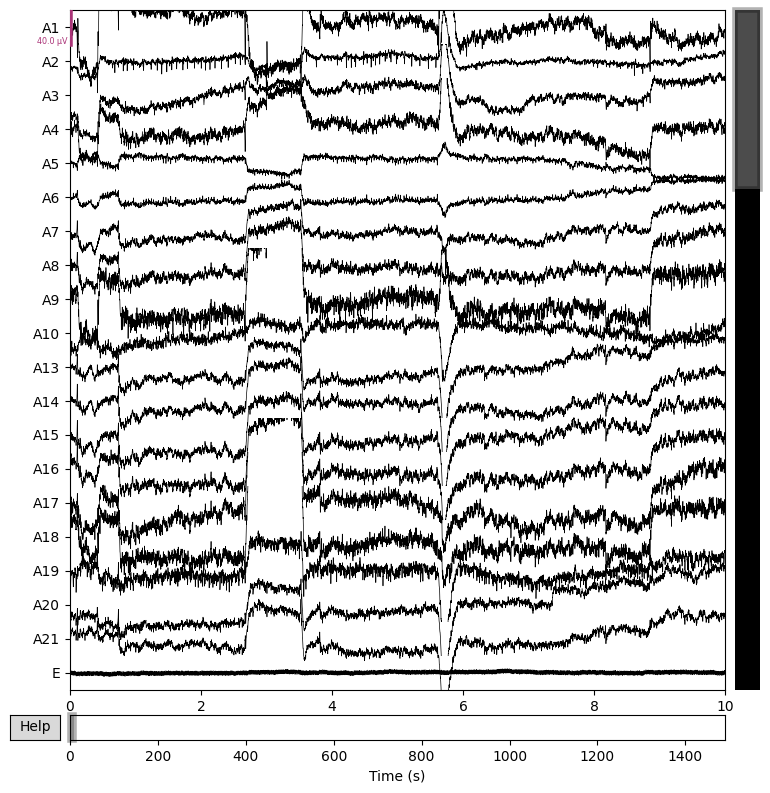

Reading 0 ... 1490089  =      0.000 ...  1490.089 secs...


/tmp/ipykernel_90105/2252661961.py:23: RuntimeWarning: EDF format requires equal-length data blocks, so 0.91 seconds of zeros were appended to all channels when writing the final block.
  mne.export.export_raw(file_path/'00001_crop.edf',raw_dup, overwrite=True)


In [27]:
file_path = Path('./data/00003')
# raw = mne.io.read_raw_nihon(file_path/'CJ258289.EEG', preload=False, verbose=None)
events = pd.read_csv(file_path/'00003_events.txt',header=None)
psychopy_file = pd.read_csv(file_path/'00003_psychopy.csv')
raw = mne.io.read_raw_edf(file_path/'00003.edf', preload=False, verbose=None)
# raw.info['sfreq']
# raw.get_channel_type
deviation = float(events.loc[0][0])-float(psychopy_file.loc[3].at['trigger_on_time'])
deviation = round(float(deviation),3)

# print(float(events.loc[0][0]))
raw.plot()
# raw_dup = raw.copy()
# raw_dup.plot()
raw_dup = raw.copy()
raw_dup.crop(tmin=deviation)
raw_dup.plot()

for row in range(events.shape[0]):
    events.loc[row,0] = round((float(events.loc[row,0]) - deviation),3)

# events.to_csv(file_path/'00001_crop_events.txt', header=False, index=False)
# mne.export.export_raw(file_path/'00003_crop.edf',raw_dup, overwrite=True)
# raw_dup.save(file_path/'00001_crop.fif')


In [ ]:
%reset

In [7]:
import pandas as pd
from pathlib import Path

file_path = Path('./data/00003')
psychopy_file = pd.read_csv(file_path/'00003_psychopy.csv')

psychopy_file_copy = psychopy_file.copy()
# print(psychopy_file_copy)
psychopy_file_drop = psychopy_file_copy.drop([psychopy_file_copy.index[0],psychopy_file_copy.index[1],
                         psychopy_file_copy.index[2],psychopy_file_copy.index[43],
                         psychopy_file_copy.index[164]])

psychopy_file_drop.to_csv(file_path/'00003_crop_psychopy.csv', index=False)